In [1]:
#pip install adversarial-robustness-toolbox
#pip install tensorflow-gpu==1.12.0
#介绍ART平台如何攻击针对ImageNet2012的ResNet50分类模型
#参考hhttps://github.com/IBM/adversarial-robustness-toolbox/blob/master/notebooks/attack_defense_imagenet.ipynb
%matplotlib inline

#打开调试日志
import logging
logging.basicConfig(level=logging.INFO,format="%(filename)s[line:%(lineno)d] %(levelname)s %(message)s")
logger=logging.getLogger(__name__)


import keras.backend as k
from keras.applications import resnet50
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions
from keras.utils import np_utils
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# Load model
from keras.applications.resnet50 import ResNet50, preprocess_input
from art.classifiers import KerasClassifier

model = ResNet50(weights='imagenet')
classifier = KerasClassifier(clip_values=(0, 255), model=model)

('n02510455', 'giant_panda', 0.456376)


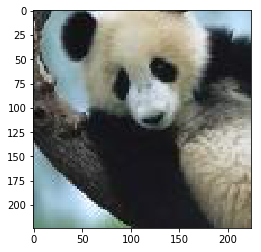

In [3]:
# Get some data
image_file = "../picture/cropped_panda.jpg"
image_ = image.load_img(image_file, target_size=(224, 224))
img = image.img_to_array(image_)
plt.imshow(img / 255)
img = img[None, ...]

# Predict for clean image
pred = classifier.predict(img)

print(decode_predictions(pred)[0][0])


In [4]:
from art.attacks import CarliniL2Method

# Create CW attacker 不定向攻击
adv = CarliniL2Method(classifier, targeted=False, max_iter=100, 
                      binary_search_steps=10, learning_rate=1e-3, initial_const=3.125)

# Generate attack image
img_adv = adv.generate(img)

# Evaluate it on model
pred_adv = model.predict(img_adv)

print(decode_predictions(pred_adv)[0][0])


('n02113624', 'toy_poodle', 0.67281663)


Noise L_0 norm: 1%
Noise L_2 norm: 1%
Noise L_inf norm: 1%


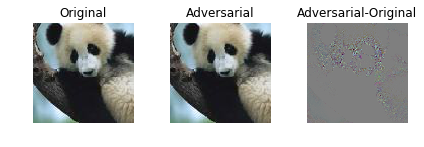

(1, 1, 1)

In [5]:
from tools import show_d

show_d(img/256.0,img_adv/256.0)